In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ML/Cleaned-Data.csv', nrows=50000);
len(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Fever                    50000 non-null  int64 
 1   Tiredness                50000 non-null  int64 
 2   Dry-Cough                50000 non-null  int64 
 3   Difficulty-in-Breathing  50000 non-null  int64 
 4   Sore-Throat              50000 non-null  int64 
 5   None_Sympton             50000 non-null  int64 
 6   Pains                    50000 non-null  int64 
 7   Nasal-Congestion         50000 non-null  int64 
 8   Runny-Nose               50000 non-null  int64 
 9   Diarrhea                 50000 non-null  int64 
 10  None_Experiencing        50000 non-null  int64 
 11  Age_0-9                  50000 non-null  int64 
 12  Age_10-19                50000 non-null  int64 
 13  Age_20-24                50000 non-null  int64 
 14  Age_25-59                50000 non-nul

In [ ]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China


In [ ]:
data=data.drop(["Country"],axis=1)

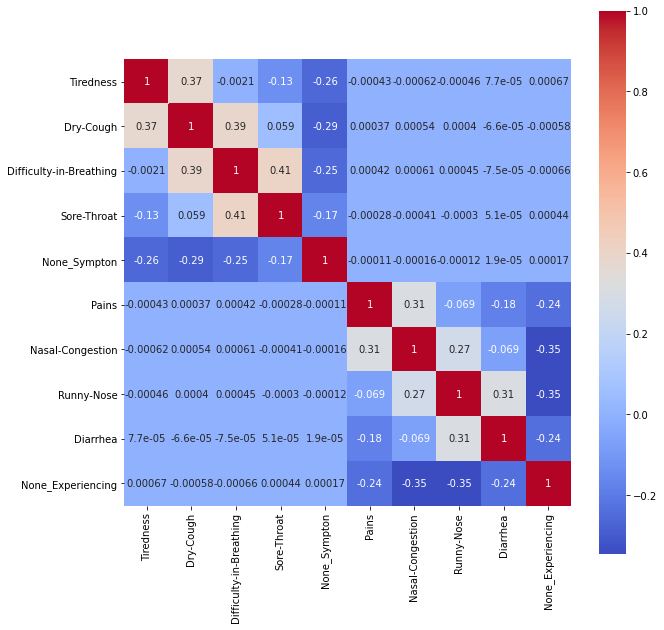

In [ ]:
features_mean= list(data.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(data[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

In [ ]:
print(data)

       Fever  Tiredness  Dry-Cough  ...  Contact_Dont-Know  Contact_No  Contact_Yes
0          1          1          1  ...                  0           0            1
1          1          1          1  ...                  0           1            0
2          1          1          1  ...                  1           0            0
3          1          1          1  ...                  0           0            1
4          1          1          1  ...                  0           1            0
...      ...        ...        ...  ...                ...         ...          ...
49995      0          0          1  ...                  0           0            1
49996      0          0          1  ...                  0           1            0
49997      0          0          1  ...                  1           0            0
49998      0          0          1  ...                  0           0            1
49999      0          0          1  ...                  0           1      

In [ ]:
feature_columns = ['Fever', 'Tiredness', 'Pains','Dry-Cough']
X = data[feature_columns]
y = data['Age_60+']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
prediction = clf.fit(X_train, y_train).predict(X_test)
scores = cross_val_score(clf, X, y, cv=2)
print(accuracy_score(prediction, y_test))


0.8694


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_curve, auc, roc_curve

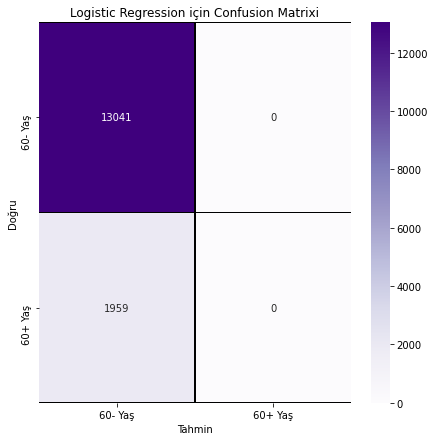

In [ ]:
cm = confusion_matrix(y_test, prediction)
x_axis_labels = ["60- Yaş", "60+ Yaş"]
y_axis_labels = ["60- Yaş", "60+ Yaş"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Tahmin")
plt.ylabel("Doğru")
plt.title('Logistic Regression için Confusion Matrixi')
#plt.savefig("lrcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

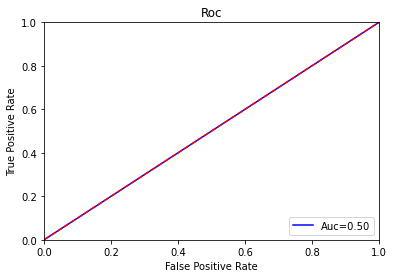

In [ ]:
fpr, tpr, threshold= metrics.roc_curve(y_test, prediction)
roc_auc=metrics.auc(fpr,tpr)
plt.title('Roc')
plt.plot(fpr,tpr,'b',label='Auc=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()